Customer Churn Prediction Project

Aim of the project:
- Use ensemble modelling to create the best model possible with only machine learning

1. Problem statement\
Our goal is to predict behavior to retain customers\
We can analyze all relevant customer data and develop focused customer retention programs

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

2. Data collection

- Dataset Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [161]:
telco_df = pd.read_csv("..\\content\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [162]:
telco_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2.2 Dataset information


In [163]:
# Display the titles of the columns
telco_df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Feature summary:
- customerID: The customer's unique identification number
- gender: The customer's gender (male or female)
- SeniorCitizen: Indicates whether the customer is a senior (0 or 1)
- Partner: Indicates whether the customer has a partner (Yes or No)
- Dependents: Indicates whether the customer has dependents (Yes or No)
- Tenure: The customer's duration of stay with the company
- PhoneService: Indicates whether the customer has phone service (Yes or No)
- MultipleLines Indicates whether the customer has multiple lines (Yes or No or No phone service)
- InternetService: The customer's service provider (No, DSL, or Fiber Optic)
- OnlineSecurity: Indicates whether the customer has internet security (Yes, No or No - internet service)
- OnlineBackup: Indicates whether the customer has online backup (Yes, No or No internet service)
- DeviceProtection: Indicates whether the customer has device protection (Yes, No or No internet service)
- TechSupport: Indciates whether the customer has tech support (Yes, No or No internet service)
- StreamingTV: Indicates whether the customer streams TV (Yes, No or No internet service)
- StreamingMovies: Indicates whether the customer streams movies (Yes, No, or No internet service)
- Contract: The customer's current contract term (Month-to-month, One year, Two year)
- PaperlessBilling: Indicates whether the customer has paperless billing (Yes or No)
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The monthly amount charged to the customer
- TotalCharges: Total amount charged to the customer
- Churn: Indicates whether the customer has churn or not (Yes or No)

In [164]:
telco_df.shape

(7043, 21)

3. Data Checks

3.1 Check Missing values

In [165]:
# Count missing values (null)
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [166]:
# Count missing values (empty strings)
telco_df.eq(' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that we have 11 missing values in the column TotalCharges\
We have 1 solution which can be to simply erase this 11 rows with missing values but since we don't know the importance of these values yet we cannot conclude on anything\
For now we can simply change these missing values in NaN values

In [167]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(" ", np.NaN)

In [168]:
# Look for missing values
telco_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3.2 Check Duplicates

In [169]:
telco_df.duplicated().sum()

0

In [170]:
telco_df.loc[telco_df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


3.3 Check data types

In [171]:
# Infos about the dataset
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 1 int feature, 2 float features and 18 string features\
TotalCharges is not suppose to be a string object so we sill take care of it


In [172]:
# Converting TotalCharges to float
telco_df['TotalCharges'] = telco_df['TotalCharges'].astype(float)
telco_df['TotalCharges'].dtypes

dtype('float64')

3.4 Checking the number of unique values of each column

In [173]:
telco_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

We can use the column customerID to check for unique entries in the dataset

In [174]:
print(telco_df['customerID'].nunique() == telco_df.shape[0])

True


Obviously we just have unique values for customerID so we can drop this column which won't help the model to learn new things

In [175]:
telco_df = telco_df.drop(["customerID"], axis=1)

3.5 Check statistics of data set

In [176]:
# I want to show the most extreme pourcentiles to display the extreme values that can be either very informatives of very annoying
pourcentiles = [.25, .50, .75, .95, .99]
telco_df.describe(percentiles=pourcentiles)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
95%,1.000000,72.000000,107.400000,6923.590000
99%,1.000000,72.000000,114.729000,8039.883000
max,1.000000,72.000000,118.750000,8684.800000


We can see that the SeniorCitizen column is a boolean value so we cannot extract any information from this type of statistics

In [177]:
# define numerical & categorical columns
numeric_features = [feature for feature in telco_df.columns if telco_df[feature].dtype != 'O']
categorical_features = [feature for feature in telco_df.columns if telco_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
    

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 16 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [178]:
# Remove boolean value 
numeric_features.remove("SeniorCitizen")

In [179]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

Plot statistics about numerical non boolean values

Correlation matrix of the numerical features

<Axes: >

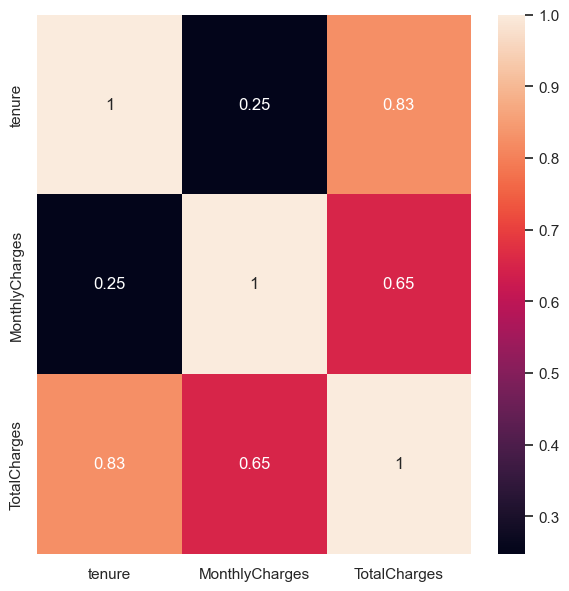

In [180]:
# Graphing the correlation between numerical features
plt.figure(figsize = (7,7))
sns.set(style = 'whitegrid')
sns.heatmap(telco_df[numeric_features].corr(), annot = True)

We observe that the TotalCharges feature is highly correlated to the tenure and the monthly charges features\
From a mathematical point of view it is easy to understand that the TotalCharges feature must be the multiplication of the MonthlyCharges by the monthly time the customer don't churn aka the tenure\
To check this out we can create a new column into the dataset called EstimatedTotalCharge which is the multiplication of the MonthlyCharges feature by the tenure feature

In [181]:
mul = telco_df[["MonthlyCharges"]].multiply(telco_df["tenure"], axis="index")

In [182]:
mul

,MonthlyCharges
0,29.85
1,1936.30
2,107.70
3,1903.50
4,141.40
...,...
7038,2035.20
7039,7430.40
7040,325.60
7041,297.60


In [183]:
mul = mul.rename(columns={"MonthlyCharges" : "EstimatedCharges"})

In [184]:
mul

,EstimatedCharges
0,29.85
1,1936.30
2,107.70
3,1903.50
4,141.40
...,...
7038,2035.20
7039,7430.40
7040,325.60
7041,297.60


In [185]:
mat = pd.concat([mul, telco_df['TotalCharges']], axis = 1)

In [186]:
mat

,EstimatedCharges,TotalCharges
0,29.85,29.85
1,1936.30,1889.50
2,107.70,108.15
3,1903.50,1840.75
4,141.40,151.65
...,...,...
7038,2035.20,1990.50
7039,7430.40,7362.90
7040,325.60,346.45
7041,297.60,306.60


<Axes: xlabel='EstimatedCharges', ylabel='TotalCharges'>

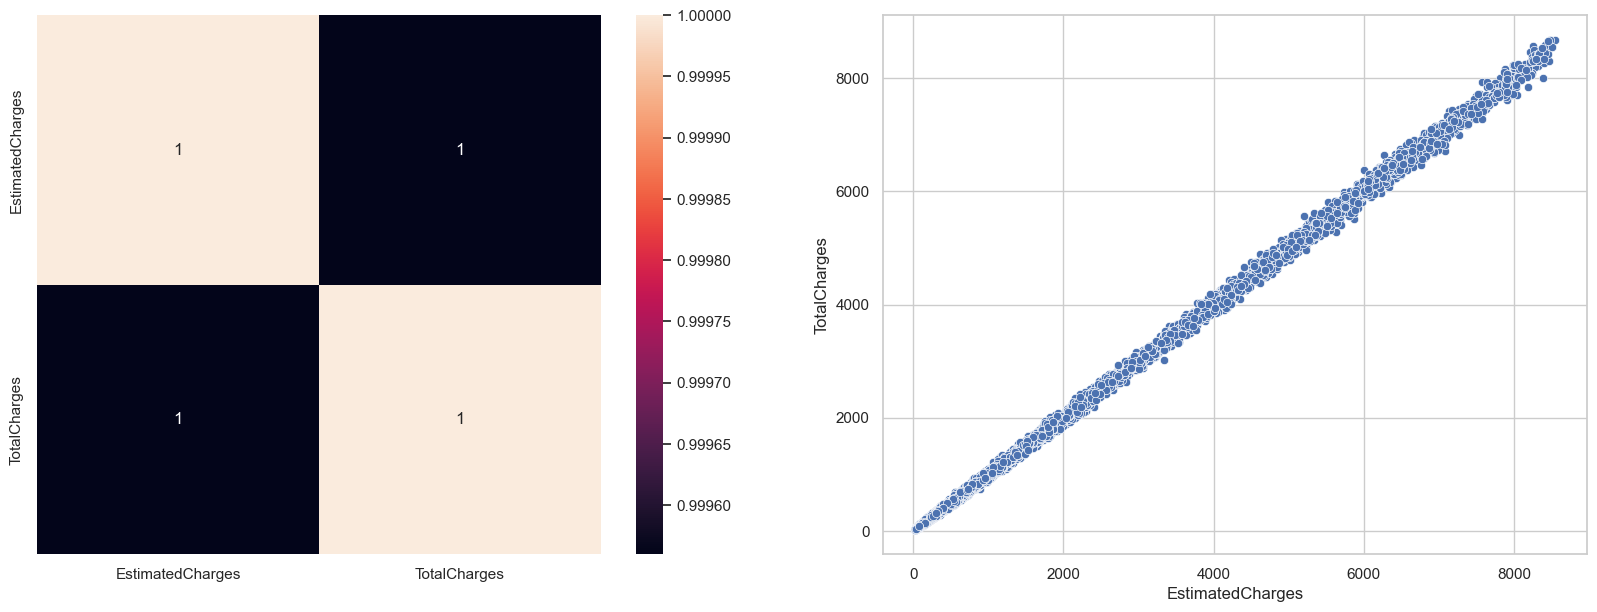

In [187]:
plt.figure(figsize = (20, 7))
sns.set_theme(style = 'whitegrid')
# Graphing the correlation matrix
plt.subplot(1,2,1)
sns.heatmap(mat.corr(), annot = True)
# Graphing a scatterplot of all entries
plt.subplot(1,2,2)
sns.scatterplot(data = mat, x = 'EstimatedCharges', y = 'TotalCharges')

With all this information we can conclude that the dropping of the TotalCharges can be performed

In [188]:
# Drop TotalCharges
telco_df = telco_df.drop('TotalCharges', axis = 1)

In [189]:
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


3.6 Check for uniformity in the object colummns

In [190]:
obj_columns = telco_df.select_dtypes(exclude=np.number).columns

for column in obj_columns:
    print(f'{telco_df[column].value_counts()}\n')

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                 

In [191]:
telco_df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Visualize the churning rate

In [192]:
# Useful Helper Function
def annotate_percent(ax, df, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2
        ax.annotate(percentage, (x,y), ha = 'center', fontsize = 15,  weight = 'bold')

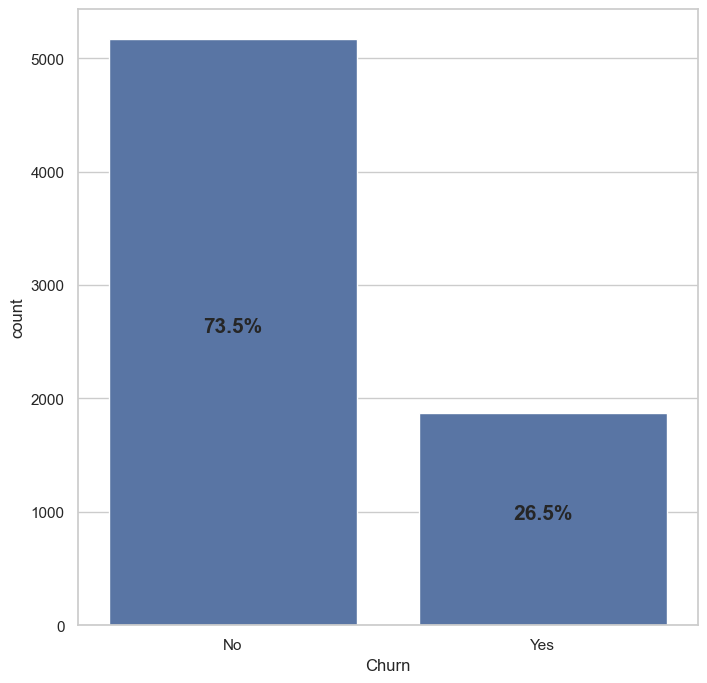

In [193]:
# Churning Rates
plt.figure(figsize = (8,8))
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(data = telco_df, x = 'Churn')
annotate_percent(ax, telco_df, telco_df.shape[0])

The data is imbalanced as only 27% of the customers have churned

3.7 Demographic analysis

In [194]:
# Import plotly libs
import plotly.express as px
from plotly.subplots import make_subplots

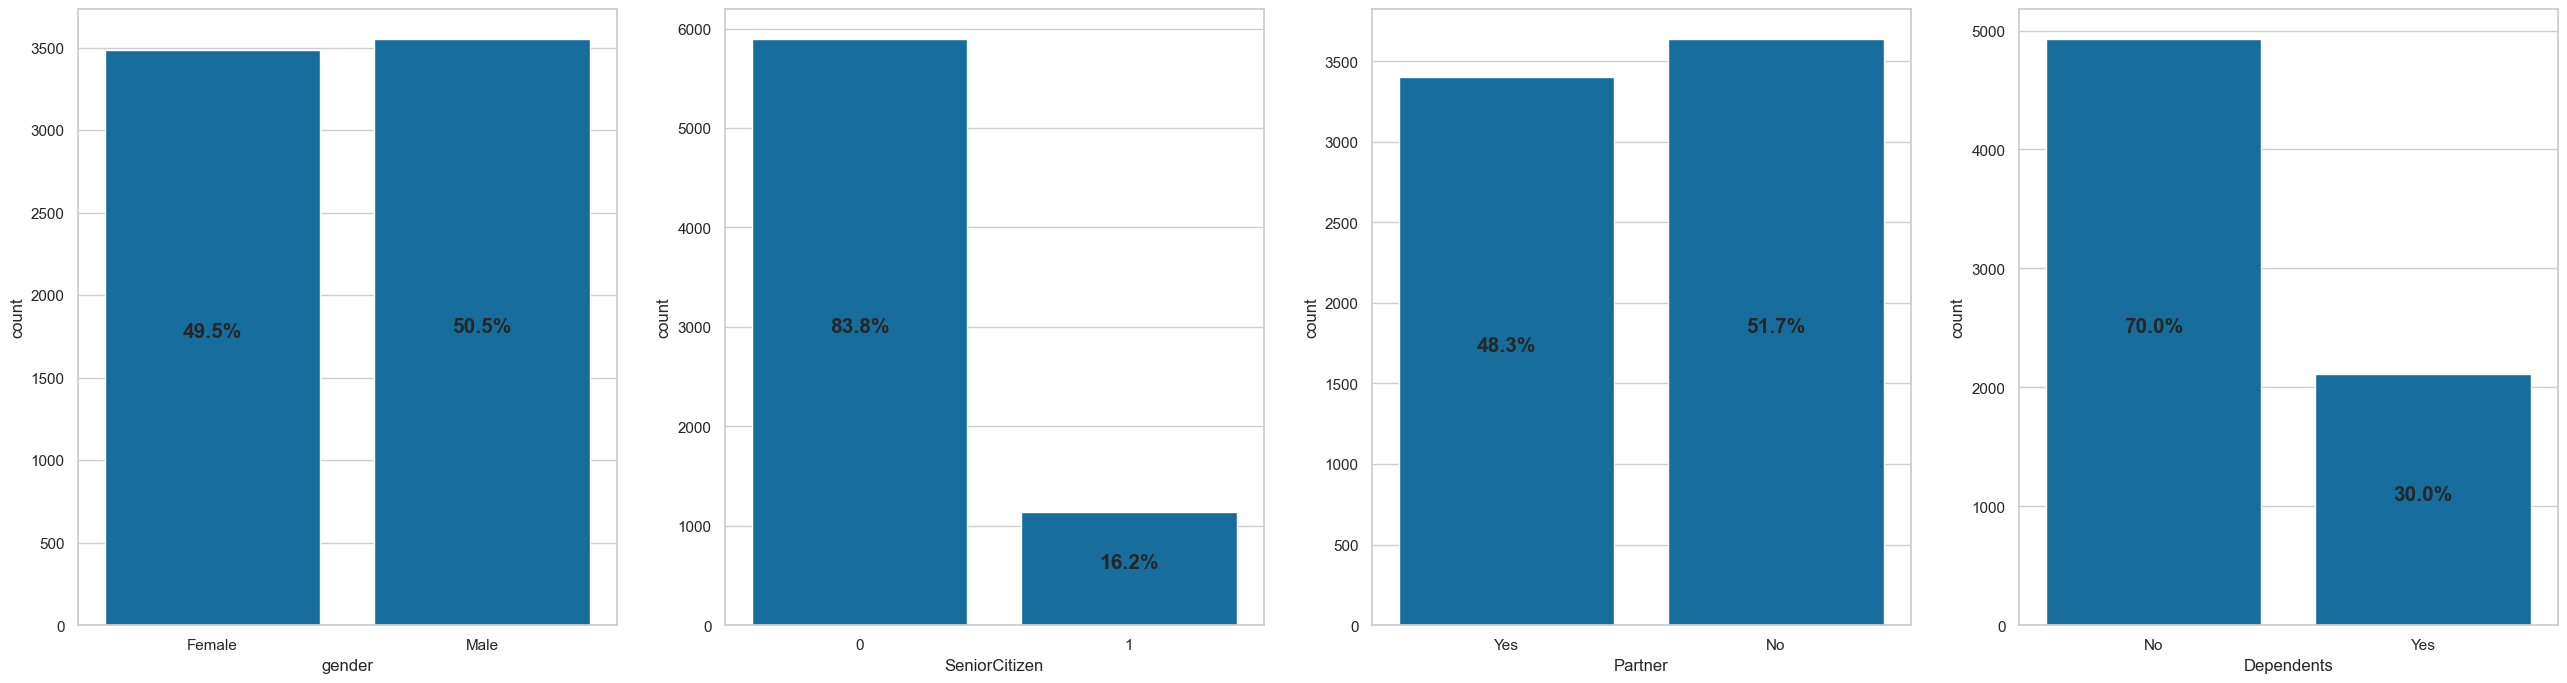

In [195]:
# Perform a Categorical Summary
plt.figure(figsize = (32,8))
sns.set_theme(style = 'whitegrid', palette="colorblind")

plt.subplot(1,4,1)
ax1 = sns.countplot(data = telco_df, x = 'gender')
annotate_percent(ax1, telco_df, telco_df.shape[0])

plt.subplot(1,4,2)
ax2 = sns.countplot(data = telco_df, x = 'SeniorCitizen')
annotate_percent(ax2, telco_df, telco_df.shape[0])

plt.subplot(1,4,3)
ax3 = sns.countplot(data = telco_df, x = 'Partner')
annotate_percent(ax3, telco_df, telco_df.shape[0])

plt.subplot(1,4,4)
ax4 = sns.countplot(data = telco_df, x = 'Dependents')
annotate_percent(ax4, telco_df, telco_df.shape[0])

Observations:
- Most of the customers in this dataset are younger and independant people
- There is a relatively equal distribution of user gender and marital status

What is the relationship between the cost and the customer churn if there is one

In [196]:
fig = px.box(telco_df,
            x = 'Churn',
            y = 'MonthlyCharges',
            color = 'Churn',
            width=800,
            height=600)
fig.show()

This plot is showing us that the customer churning pay a greater median subscription

Let's encode the categorical features

In [197]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()


In [198]:
cat_features = telco_df.drop(['MonthlyCharges','SeniorCitizen','tenure'],axis=1)

In [199]:
cat_features.tail()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7042,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No


In [200]:
cat_df = cat_features.apply(label_encoding.fit_transform)
cat_df.tail()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1
7042,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0


In [201]:
# Merge the encoded dataset and the main dataset

num_features = telco_df[['MonthlyCharges','SeniorCitizen','tenure']]
dataset = pd.merge(num_features, cat_df, left_index=True, right_index=True)
dataset.head()

,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,56.95,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,53.85,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,42.30,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,70.70,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [202]:
dataset

,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,56.95,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,53.85,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,42.30,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,70.70,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,24,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,103.20,0,72,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,29.60,0,11,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,74.40,1,4,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [203]:
clean_dataset = dataset.to_csv("..\\content\\clean_dataset.csv", index=False)

We saw earlier an imbalance in the churn label\
We will solve this problem using oversampling

We will create the splitted data first

In [204]:
# Drop the user ID because the model won't learn anything from it
dataset = dataset.dropna()

In [205]:
dataset.shape

(7043, 19)

In [206]:
X = dataset.drop(['Churn'],axis=1)
y = dataset['Churn']

In [207]:
from sklearn.model_selection import train_test_split
X_rest, X_test, y_rest, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.15, random_state = 43, stratify = y_rest)

In [208]:
# Print shape of training, test, and cross-validation data
print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Cross-Validation Data Shape: {X_val.shape}")
print(f"Cross-Validation Target Shape: {y_val.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Data Shape: (4788, 18)
Training Target Shape: (4788,)
Cross-Validation Data Shape: (846, 18)
Cross-Validation Target Shape: (846,)
Test Data Shape: (1409, 18)
Test Target Shape: (1409,)


In [209]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
# Specify numerical columns
to_scale_columns = ['tenure', 'MonthlyCharges']
scaler = StandardScaler()
scaler.fit(X_train[to_scale_columns])

StandardScaler()

In [258]:
# Save the scaler object
import pickle
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [210]:
# Transform the training, cross validation, and test set
X_train_num_new = scaler.transform(X_train[to_scale_columns])
X_val_num_new = scaler.transform(X_val[to_scale_columns])
X_test_num_new = scaler.transform(X_test[to_scale_columns])

In [211]:
X_train_num_new

array([[ 1.57745205,  1.62225356],
       [ 1.4138281 ,  1.34788273],
       [-0.91781312, -1.49227106],
       ...,
       [-1.24506101,  0.49816459],
       [-0.14059938, -0.31995934],
       [-0.83600114, -0.52615318]])

In [212]:
# Convert the lists into Pandas Dataframe
X_train_num_new = pd.DataFrame(X_train_num_new, columns = to_scale_columns)
X_val_num_new = pd.DataFrame(X_val_num_new, columns = to_scale_columns)
X_test_num_new = pd.DataFrame(X_test_num_new, columns = to_scale_columns)

In [213]:
X_train_num_new

,tenure,MonthlyCharges
0,1.577452,1.622254
1,1.413828,1.347883
2,-0.917813,-1.492271
3,-0.672377,0.671101
4,1.127486,-1.325986
...,...,...
4783,-0.917813,-1.003392
4784,-0.549659,-0.491233
4785,-1.245061,0.498165
4786,-0.140599,-0.319959


Verify the scaling

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

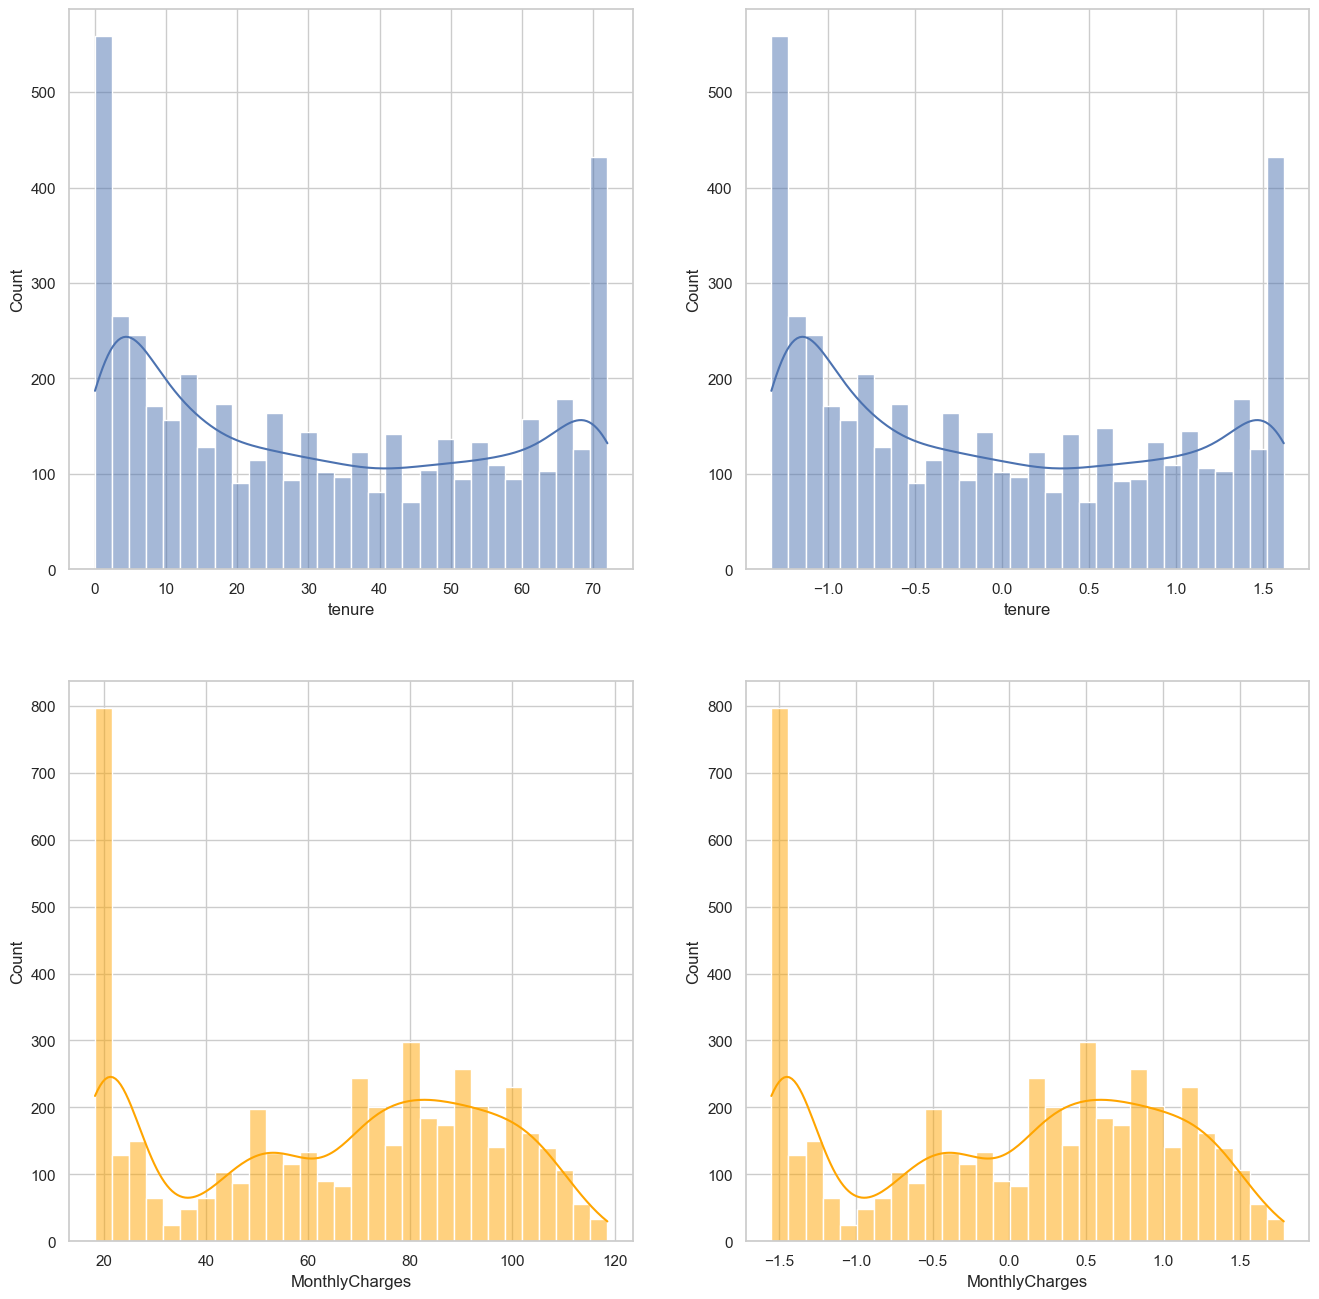

In [214]:
# Plot the training set as reference to verify correct scaling
plt.figure(figsize = (16,16))
sns.set(style = 'whitegrid')

plt.subplot(2,2,1)
sns.histplot(data = X_train['tenure'], bins = 30, kde = True)

plt.subplot(2,2,2)
sns.histplot(data = X_train_num_new['tenure'], bins = 30, kde = True)

plt.subplot(2,2,3)
sns.histplot(data = X_train['MonthlyCharges'], bins = 30, kde = True, color = 'orange')

plt.subplot(2,2,4)
sns.histplot(data = X_train_num_new['MonthlyCharges'], bins = 30, kde = True, color = 'orange')

Quantile Transformer\
We can transform the column tenure and MonthlyCharges using a Quantile Transformer function, which is a common non-parametric statistical method used to transform the dataset into a Gaussian Distribution.\
This is included in scikit-learn preprocessing libary, named QuantileTransformer

<Axes: ylabel='MonthlyCharges(trans)'>

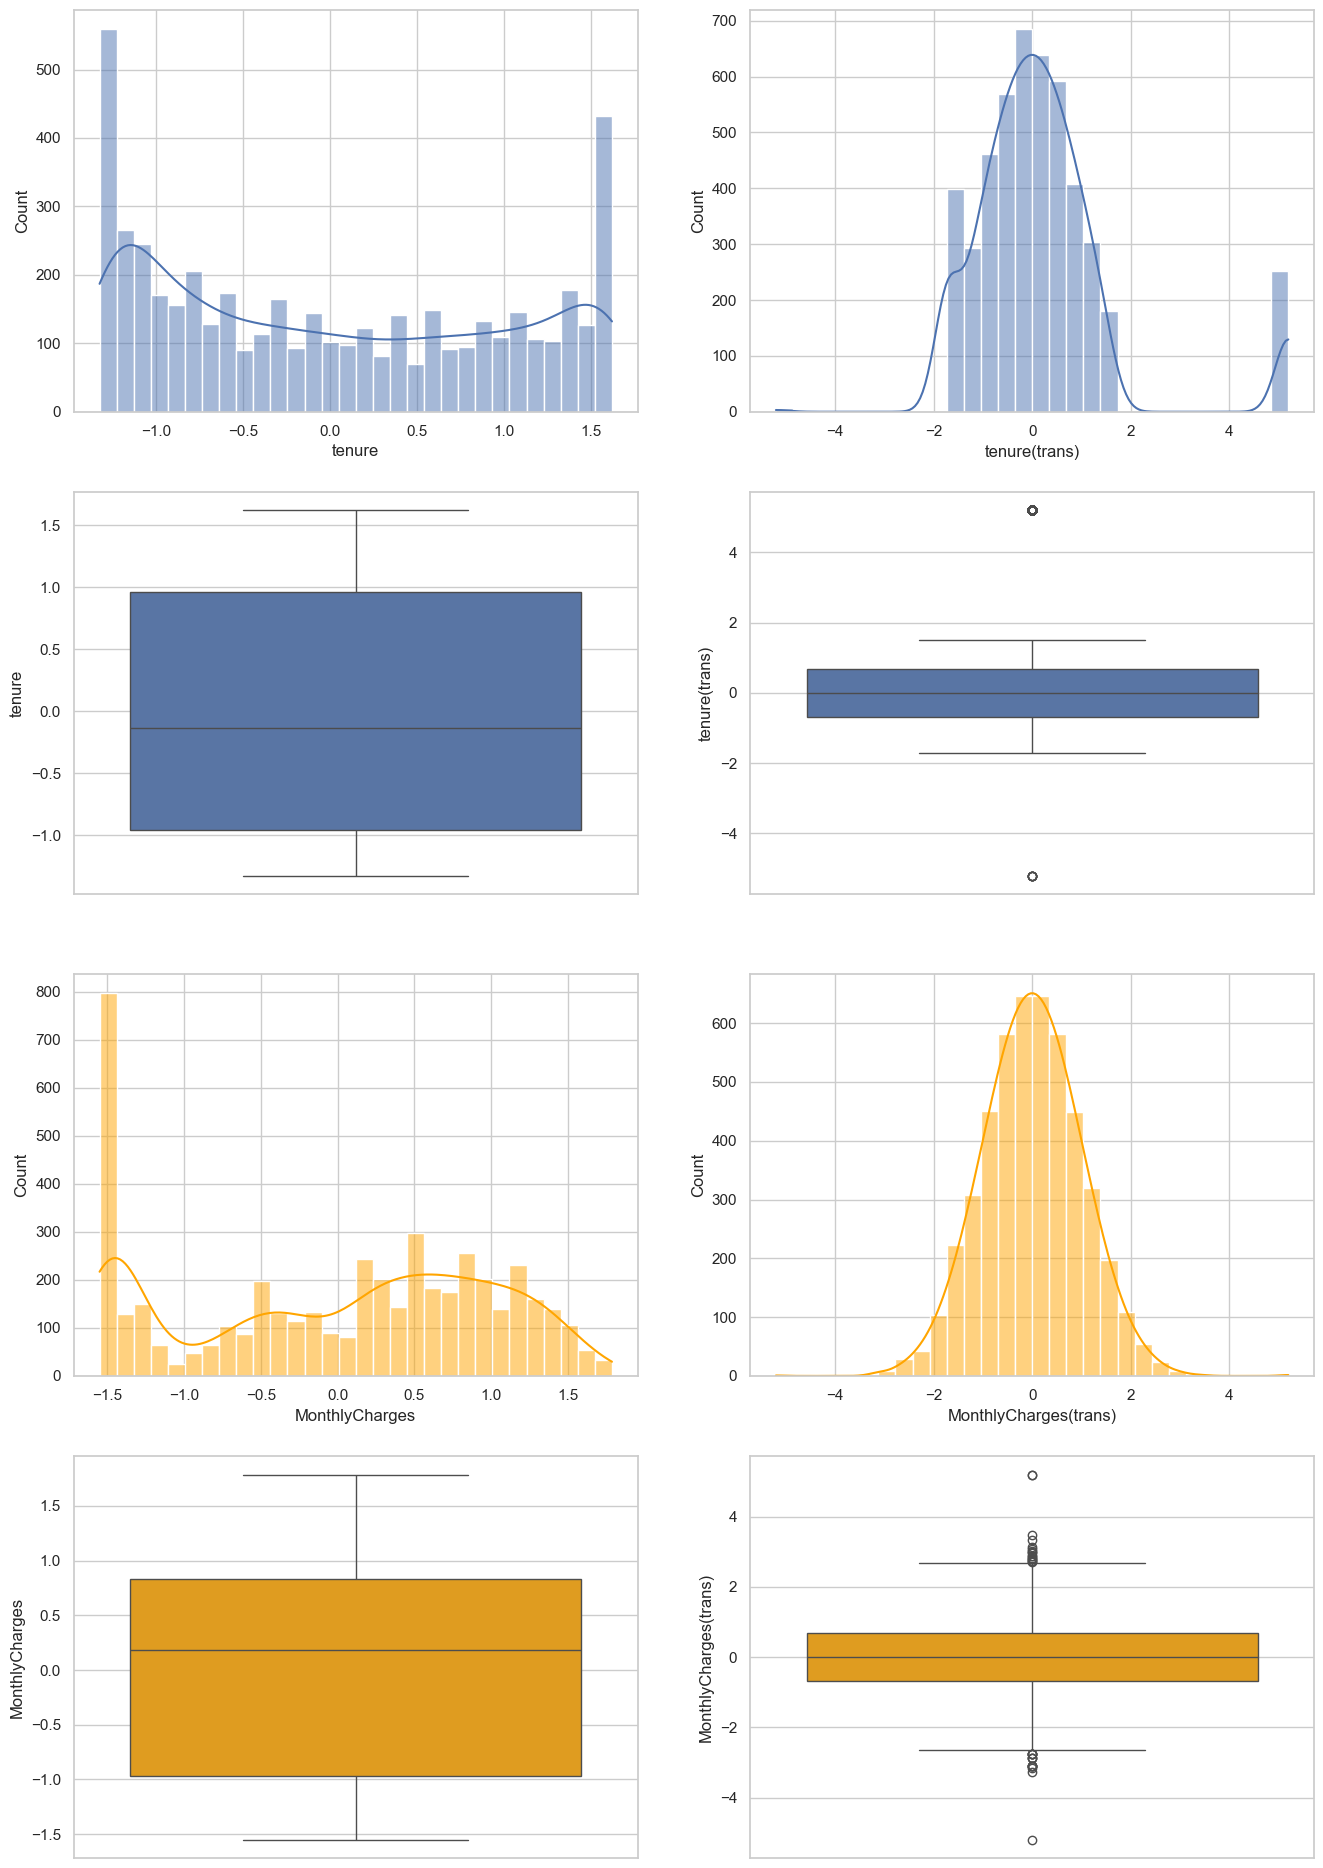

In [215]:
qt = QuantileTransformer(output_distribution = 'normal')
qt.fit(X_train_num_new)

# Transform the columns tenure and monthly charges
X_train_trans = qt.transform(X_train_num_new)
X_val_trans = qt.transform(X_val_num_new)
X_test_trans = qt.transform(X_test_num_new)

# Convert to Pandas DataFrame
num_cols_trans = ['tenure(trans)', 'MonthlyCharges(trans)']
X_train_trans = pd.DataFrame(X_train_trans, columns = num_cols_trans)
X_val_trans = pd.DataFrame(X_val_trans, columns = num_cols_trans)
X_test_trans = pd.DataFrame(X_test_trans, columns = num_cols_trans)

# Graph the instances on a histogram
plt.figure(figsize = (16,24))
sns.set(style = 'whitegrid')

# Tenure
plt.subplot(4,2,1)
sns.histplot(data = X_train_num_new['tenure'], bins = 30, kde = True)

plt.subplot(4,2,2)
sns.histplot(data = X_train_trans['tenure(trans)'], bins = 30, kde = True)
             
plt.subplot(4,2,3)
sns.boxplot(data = X_train_num_new['tenure'])

plt.subplot(4,2,4)
sns.boxplot(data = X_train_trans['tenure(trans)'])

# Monthly Charges
plt.subplot(4,2,5)
sns.histplot(data = X_train_num_new['MonthlyCharges'], bins = 30, kde = True, color = 'Orange')

plt.subplot(4,2,6)
sns.histplot(data = X_train_trans['MonthlyCharges(trans)'], bins = 30, kde = True, color = 'Orange')
             
plt.subplot(4,2,7)
sns.boxplot(data = X_train_num_new['MonthlyCharges'], color = 'Orange')

plt.subplot(4,2,8)
sns.boxplot(data = X_train_trans['MonthlyCharges(trans)'], color = 'Orange')

In [216]:
# Drop original tenure and monthlycharges column
X_train = X_train.drop(to_scale_columns, axis = 1)
X_val = X_val.drop(to_scale_columns, axis = 1)
X_test = X_test.drop(to_scale_columns, axis = 1)

# Save dataset for modelling
X_train = pd.concat([X_train_trans.reset_index(drop = True), X_train.reset_index(drop = True)], axis = 1)
X_val = pd.concat([X_val_trans.reset_index(drop = True), X_val.reset_index(drop = True)], axis = 1)
X_test = pd.concat([X_test_trans.reset_index(drop = True), X_test.reset_index(drop = True)], axis = 1)

# Print dataset
X_train

,tenure(trans),MonthlyCharges(trans),SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1.521525,2.196894,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1
1,1.154615,1.505747,1,0,1,0,1,2,1,2,2,2,2,0,2,1,1,1
2,-0.619578,-1.355761,0,1,0,0,1,0,2,1,1,1,1,1,1,0,1,1
3,-0.372246,0.484741,1,1,1,0,1,2,1,0,0,0,0,2,0,0,1,1
4,0.832006,-0.857097,0,0,0,0,1,2,2,1,1,1,1,1,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,-0.619578,-0.698150,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,2
4784,-0.273089,-0.447011,0,1,1,1,1,2,0,0,0,0,0,0,0,0,0,1
4785,-1.278137,0.280911,0,1,0,0,1,0,1,0,0,2,2,0,0,0,1,2
4786,-0.002509,-0.307111,0,0,0,0,1,2,0,0,2,0,0,0,0,1,1,2


Save the quantile transformation

In [301]:
pickle.dump(qt, open('quantile.sav', 'wb'))

ROC Curve function

In [217]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, mean_squared_error
def roc_print(y_true, y_pred):
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()

Function to print the metric scores

In [218]:
from sklearn.metrics import accuracy_score
def print_metrics(y_true, y_pred):
    
    # Calculate metrics
    score = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    
    # Output to console
    print("---------- Metrics ----------")
    print(f"Accuracy: {score}")
    print(f"F1 score: {f1}")
    print(f"AUC score: {auc_score}")
    
    return [score, f1, auc_score]

Add the oversampling to the dataset

In [219]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(sampling_strategy='minority')
X_smote, y_smote = oversampling.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [220]:
y_train.value_counts()

Churn
0    3517
1    3517
Name: count, dtype: int64

The distribution of the samples are equal !

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [222]:
from sklearn.metrics import accuracy_score
rf_pred = rf.predict(X_val)
print(accuracy_score(rf_pred, y_val))

0.7777777777777778


The problem is that accuracy is not a good metric in this case

In [223]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_val, rf_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       621
           1       0.57      0.64      0.61       225

    accuracy                           0.78       846
   macro avg       0.72      0.73      0.73       846
weighted avg       0.79      0.78      0.78       846



In [224]:
print_metrics(y_val, rf_pred)

---------- Metrics ----------
Accuracy: 0.7777777777777778
F1 score: 0.6050420168067226
AUC score: 0.7338486312399357


[0.7777777777777778, 0.6050420168067226, 0.7338486312399357]

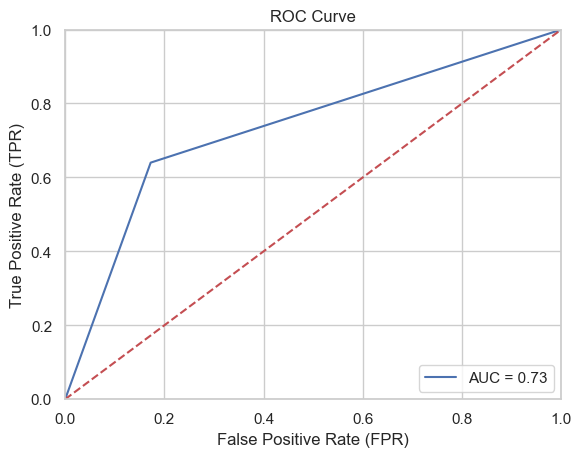

In [225]:
# Print ROC Curve
roc_print(y_val, rf_pred)

In [226]:
final_rf_prediction = rf.predict(X_test)

In [227]:
print_metrics(y_test, final_rf_prediction)

---------- Metrics ----------
Accuracy: 0.7721788502484032
F1 score: 0.5952080706179067
AUC score: 0.727550798596375


[0.7721788502484032, 0.5952080706179067, 0.727550798596375]

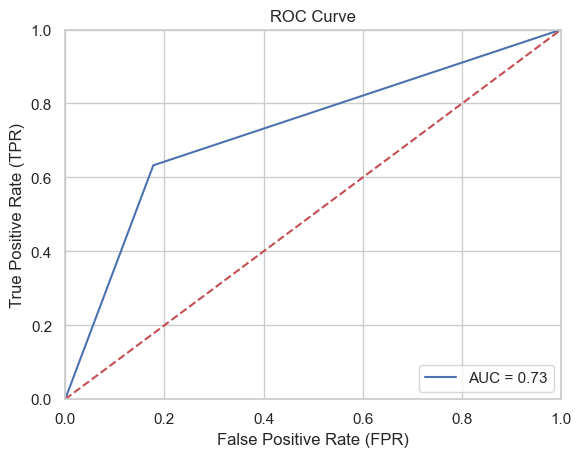

In [228]:
# Print ROC Curve
roc_print(y_test, final_rf_prediction)

See we observe very bad precision and recall for people churning

We need to fing better ways to achieve a good model

Let's try Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
# Train the logistic regression model
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

In [230]:
lr_pred = lr.predict(X_val)
print("Classification Report")
print(classification_report(y_val, lr_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       621
           1       0.50      0.78      0.61       225

    accuracy                           0.73       846
   macro avg       0.70      0.75      0.70       846
weighted avg       0.79      0.73      0.75       846



In [231]:
print_metrics(y_val, lr_pred)

---------- Metrics ----------
Accuracy: 0.7340425531914894
F1 score: 0.6086956521739131
AUC score: 0.7479871175523349


[0.7340425531914894, 0.6086956521739131, 0.7479871175523349]

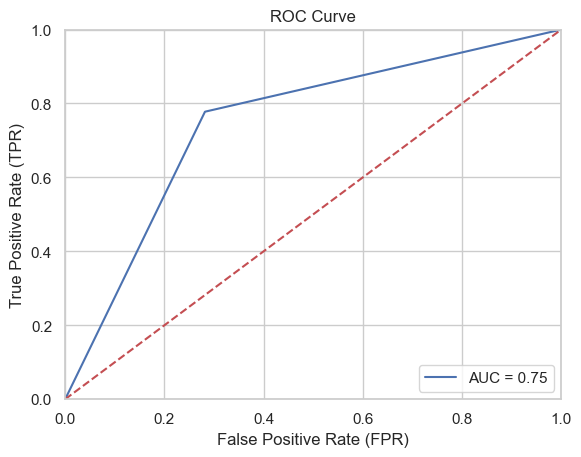

In [232]:
roc_print(y_val, lr_pred)

Hyperparameter Tuning for Logistic Regression:\
While the logistic regression model does not have any critical hyperparameters to tune, we can still identify some important hyperparameters that will improve runtime performance and predictive accuracy. The list of which are:
- Penalty: which indicates our chosen norm for regularization
- solver: which indicates the chosen solver for our model
- C: which is the regularization parameter
- threshold: which indicates the threshold chosen as cutoff for our prediction probability.

In [233]:
def objective_logistic(trial):
    
    # Specify possible parameters
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', None])
    C = trial.suggest_float('C', 0.1, 100)
    
    if penalty == 'l1':
        supported = trial.suggest_categorical('solverl1', ['liblinear', 'saga'])
    elif penalty == 'l2':
        supported = trial.suggest_categorical('solverl2', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    else:
        supported = trial.suggest_categorical('solverNone', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    threshold = trial.suggest_float('threshold', 0, 1)
    
    # Train model
    model = LogisticRegression(solver = supported, penalty = penalty, C = C)
    model.fit(X_train, y_train)
    
    # Predict result
    p_pred = pd.DataFrame(lr.predict_proba(X_val))
    Y_pred = p_pred.map(lambda x : 1 if x > threshold else 0)
    y_pred = Y_pred.iloc[:,1].tolist()
    
    # Calculate accuracy, F1, and AUC metrics
    score = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc_score = auc(fpr, tpr)
    
    return score * f1 * auc_score

In [234]:
import optuna
study = optuna.create_study(direction = 'maximize')
study.optimize(objective_logistic, n_trials = 1000)
print("---------------------------------------------------------------------------------------------")
print(f"Best trial obtains a score of {study.best_value} with parameters: {study.best_trial.params}")
print("---------------------------------------------------------------------------------------------")

[I 2024-06-08 19:58:55,253] A new study created in memory with name: no-name-94504036-bda8-43ad-a0a5-18371ef07d5f
[I 2024-06-08 19:58:55,327] Trial 0 finished with value: 0.3404445547893979 and parameters: {'penalty': 'l1', 'C': 49.79855881672329, 'solverl1': 'liblinear', 'threshold': 0.6169703136337242}. Best is trial 0 with value: 0.3404445547893979.
[I 2024-06-08 19:58:55,405] Trial 1 finished with value: 0.32684857483969415 and parameters: {'penalty': 'l2', 'C': 35.513186108360195, 'solverl2': 'liblinear', 'threshold': 0.36462172054964526}. Best is trial 0 with value: 0.3404445547893979.
[I 2024-06-08 19:58:55,460] Trial 2 finished with value: 0.29457194009957427 and parameters: {'penalty': 'l2', 'C': 28.720379296476075, 'solverl2': 'sag', 'threshold': 0.3271452197576449}. Best is trial 0 with value: 0.3404445547893979.
[I 2024-06-08 19:58:55,527] Trial 3 finished with value: 0.27309615522381475 and parameters: {'penalty': 'l2', 'C': 42.99160076205196, 'solverl2': 'newton-cholesky'

---------------------------------------------------------------------------------------------
Best trial obtains a score of 0.356730970972389 with parameters: {'penalty': 'l2', 'C': 11.783682650690377, 'solverl2': 'lbfgs', 'threshold': 0.5494273533319521}
---------------------------------------------------------------------------------------------


In [235]:
# Save optimal parameters to variables
penalty = study.best_trial.params['penalty']
C = study.best_trial.params['C']
solver = study.best_trial.params[f'solver{penalty}']
thres = study.best_trial.params['threshold']

# Print new result on the cross-validation set
new_lr = LogisticRegression(penalty = penalty, C = C, solver = solver)
new_lr.fit(X_train, y_train)

p_val_pred = pd.DataFrame(new_lr.predict_proba(X_val))
Y_val_pred = p_val_pred.map(lambda x : 1 if x > thres else 0)
best_lr_pred = Y_val_pred.iloc[:,1].tolist()

print_metrics(y_val, best_lr_pred)

---------- Metrics ----------
Accuracy: 0.7612293144208038
F1 score: 0.6217228464419475
AUC score: 0.7537520128824475


[0.7612293144208038, 0.6217228464419475, 0.7537520128824475]

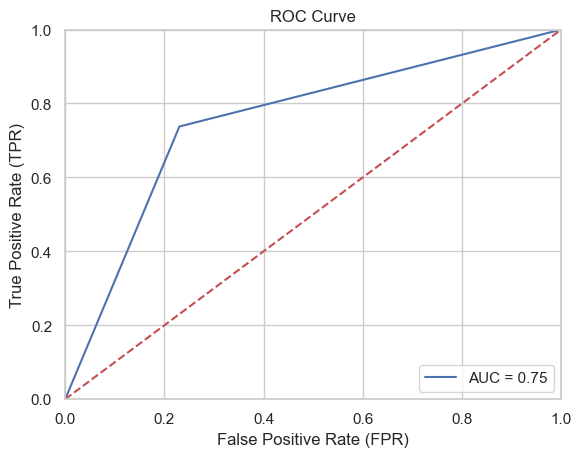

In [236]:
roc_print(y_val, best_lr_pred)

Use the test dataset on the best model

In [237]:
# Predict result on the test set
p_pred = pd.DataFrame(new_lr.predict_proba(X_test))
Y_pred = p_pred.map(lambda x : 1 if x > thres else 0)
final_lr_pred = Y_pred.iloc[:,1].tolist()

In [238]:
print_metrics(y_test, final_lr_pred)

---------- Metrics ----------
Accuracy: 0.7650816181689141
F1 score: 0.6374589266155531
AUC score: 0.7699066837806783


[0.7650816181689141, 0.6374589266155531, 0.7699066837806783]

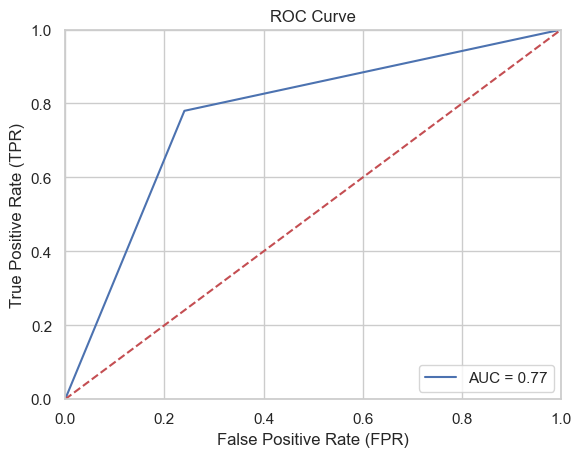

In [239]:
roc_print(y_test, final_lr_pred)

Let's try ensemble model

In [240]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_


0.8356553881148706

In [241]:
bag_prediction = bag_model.predict(X_val)

In [242]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_val, bag_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       621
           1       0.57      0.70      0.63       225

    accuracy                           0.78       846
   macro avg       0.72      0.75      0.73       846
weighted avg       0.80      0.78      0.78       846



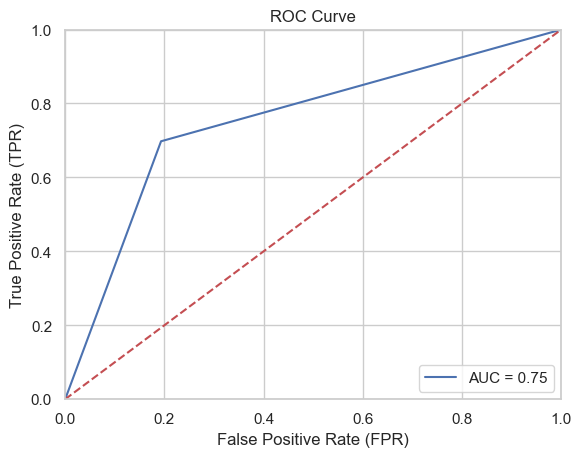

In [243]:
roc_print(y_val, bag_prediction)

In [244]:
print_metrics(y_val, bag_prediction)

---------- Metrics ----------
Accuracy: 0.7777777777777778
F1 score: 0.6254980079681275
AUC score: 0.7522705314009662


[0.7777777777777778, 0.6254980079681275, 0.7522705314009662]

Use the test dataset on the bagging model

In [245]:
final_bag_prediction = bag_model.predict(X_test)

In [246]:
print_metrics(y_test, final_bag_prediction)

---------- Metrics ----------
Accuracy: 0.7714691270404542
F1 score: 0.6255813953488372
AUC score: 0.7553774571200844


[0.7714691270404542, 0.6255813953488372, 0.7553774571200844]

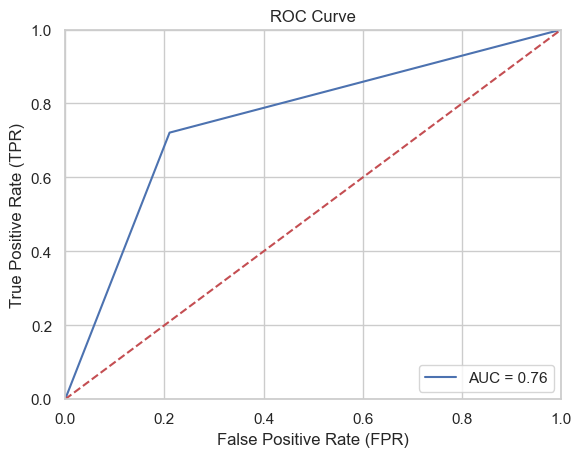

In [247]:
roc_print(y_test, final_bag_prediction)

Automation of the Hyperparameter research with GridSearchCV

In [248]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [249]:
# Define classifiers/models
classifiers = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ("knn", KNeighborsClassifier(metric = 'cosine'))
]

In [250]:
# Feature selection and Voting Classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

In [251]:
pipeline = ImbPipeline([
    ('voting_clf', voting_clf)
])

In [252]:
param_grid = {
    'voting_clf__logreg__C': [0.1, 1.0, 10],
    'voting_clf__rf__n_estimators': [50, 100, 200],
    'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2]
}

In [253]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('voting_clf',
                                        VotingClassifier(estimators=[('logreg',
                                                                      LogisticRegression(max_iter=1000)),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('gbc',
                                                                      GradientBoostingClassifier()),
                                                                     ('knn',
                                                                      KNeighborsClassifier(metric='cosine'))],
                                                         voting='soft'))]),
             param_grid={'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2],
                         'voting_clf__logreg__C': [0.1, 1.0, 10],
                         'voting_clf__rf__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [254]:
# Best parameters and estimator
print("Best parameters found: ", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

Best parameters found:  {'voting_clf__gbc__learning_rate': 0.2, 'voting_clf__logreg__C': 0.1, 'voting_clf__rf__n_estimators': 50}


In [255]:
# Predictions
y_pred = best_estimator.predict(X_test)

In [302]:
# Evaluation
print_metrics(y_test, y_pred)

---------- Metrics ----------
Accuracy: 0.7721788502484032
F1 score: 0.6397306397306397
AUC score: 0.7695857960603268


[0.7721788502484032, 0.6397306397306397, 0.7695857960603268]

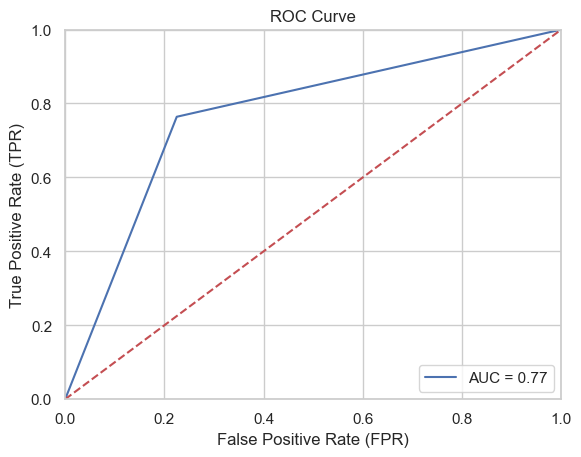

In [269]:
roc_print(y_test, y_pred)

In [300]:
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1036
           1       0.55      0.76      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



Let's save the best model

In [259]:
pickle.dump(best_estimator, open('best_estimator.pkl', 'wb'))

In [297]:
result = best_estimator.predict([[0.576075,	-2.074445,	0,	0,	1,	1,	1,	0,	2,	1,	1,	1,	1,	1,	1,	2,	0,	3]])[0]

In [288]:
X_test

,tenure(trans),MonthlyCharges(trans),SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.716415,-0.879040,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2
1,0.287442,-0.823172,0,1,0,0,1,2,2,1,1,1,1,1,1,0,1,0
2,0.576075,-2.074445,0,0,1,1,1,0,2,1,1,1,1,1,1,2,0,3
3,-1.716415,0.193909,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,2
4,1.154615,-0.425228,0,1,0,0,1,0,0,0,0,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.997920,-0.092443,0,0,1,0,1,0,0,0,2,2,2,0,2,2,1,3
1405,0.545244,1.885275,0,1,1,1,1,2,1,2,2,0,2,2,2,1,0,1
1406,-0.340163,-1.425011,0,1,1,1,1,0,2,1,1,1,1,1,1,1,0,0
1407,1.301191,-0.604787,0,0,1,1,0,1,0,2,0,2,0,0,2,2,1,1


In [295]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

In [298]:
result

0